Task 4: Classification with Logistic Regression.
Objective: Build a binary classifier using logistic regression.
Tools: Scikit-learn, Pandas, Matplotlib

## 1.Data Preprocessing

In [22]:
#Import the dataset
import pandas as pd
df = pd.read_csv("/Breast Cancer- Dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
#Understand the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [25]:
# Drop the 'Unnamed: 32' column as it contains only null values
df = df.drop('Unnamed: 32', axis=1)
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical 'diagnosis' column
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Display the first few rows to show the encoded column
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2.Train/test split and standardize features

In [27]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 31)
Shape of X_test: (114, 31)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print("Scaled X_train:")
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

# Display the first few rows of the scaled testing data
print("\nScaled X_test:")
display(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())

Scaled X_train:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.237127,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,-0.237020,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-0.237129,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,0.424697,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-0.237131,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732



Scaled X_test:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.242956,-0.466497,-0.137289,-0.444211,-0.486465,0.280850,0.041606,-0.111465,-0.264869,0.415241,...,-0.263235,-0.147842,-0.331548,-0.351093,0.480019,-0.096496,-0.035830,-0.194351,0.172757,0.203730
1,-0.237126,1.365363,0.498665,1.305511,1.341471,-0.406539,-0.013724,0.240637,0.821449,-0.833981,...,1.794619,0.172372,1.763661,1.744141,-0.530514,-0.123620,-0.028181,0.991779,-0.561211,-1.008389
2,-0.243554,0.380066,0.069220,0.404101,0.266596,0.967520,0.356414,0.726902,0.857221,0.437094,...,0.629403,0.076638,0.533832,0.492044,1.000466,-0.086163,0.499625,0.570350,-0.107831,-0.206293
3,-0.236761,-0.486317,-0.353185,-0.428570,-0.526233,0.694290,0.533852,-0.144722,-0.533686,0.000048,...,-0.698111,-0.433394,-0.524721,-0.636959,0.584109,0.065603,-0.163957,-0.620377,-0.553285,0.545322
4,-0.236659,-0.729810,-1.113514,-0.709283,-0.709281,0.294512,0.159898,-0.271202,-0.587608,0.025542,...,-0.827117,-0.966535,-0.849575,-0.739243,0.128718,-0.264407,-0.453677,-0.689644,-0.913135,-0.141789


## 3.Fit a Logistic Regression model.

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

print("Logistic Regression model fitted successfully!")

Logistic Regression model fitted successfully!


## 4.Evaluate with confusion matrix, precision, recall, ROC-AUC

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC: 0.99737962659679


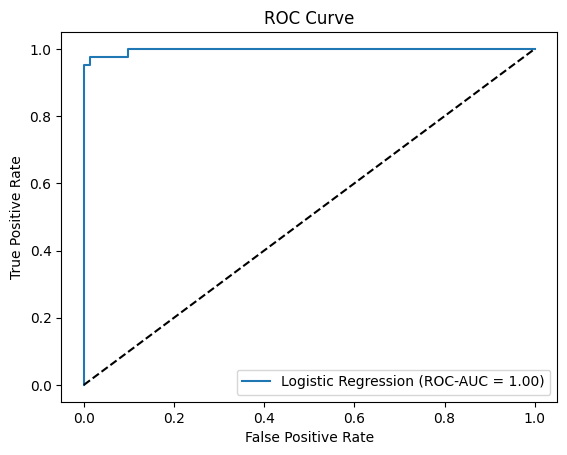

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression (ROC-AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 5.Tune threshold and explain sigmoid function.

In [32]:
# Tune threshold
from sklearn.metrics import f1_score

# Predict probabilities on the test set
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Find the optimal threshold
best_f1 = 0
best_threshold = 0
for threshold in range(0, 101):
    threshold /= 100
    y_pred_threshold = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {best_f1:.2f}")

Best Threshold: 0.39
Best F1 Score: 0.98


The sigmoid function is used in Logistic Regression to convert raw model outputs (logits) into probabilities between 0 and 1.
 It defines the cutoff for decision-making based on this smooth probability curve.

Output close to 1 → strong confidence in class 1

Output close to 0 → strong confidence in class 0

Output near 0.5 → uncertain